Implementing the K-Means clustering algorithm on the Wine quality  dataset. 
The elbow method are used to find the optimum number of clusters. 
select the optimum value for the number of clusters using k-means
clustering algorithm.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset 
wine_df=pd.read_csv('red_winequality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# check null values are present or not and display count of null values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Plotting heatmap to display correlation between two columns.

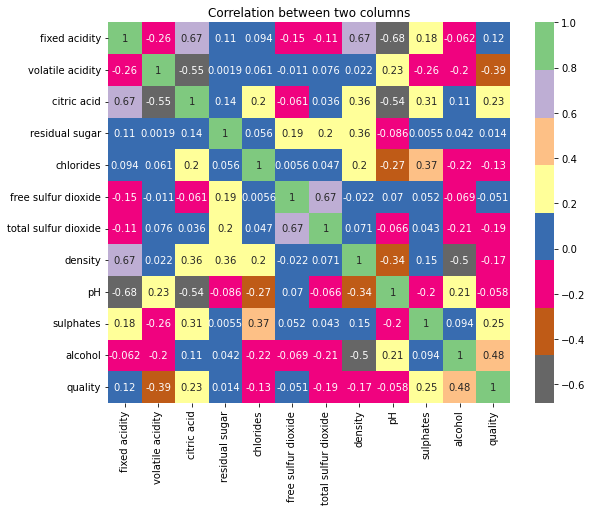

In [8]:
plt.figure(figsize=(9,7))
sns.heatmap(wine_df.corr(),annot=True,cmap='Accent_r')
plt.title('Correlation between two columns')
plt.show()

In [9]:
# Drop the target column from dataset.
wine_df=wine_df.drop('quality',axis=1)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
#shape of dropped dataset 
wine_df.shape

(1599, 11)

In [11]:
# checking dropped column from dataset
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [12]:
# import scikit library with KMeans algorithm
from sklearn.cluster import KMeans

In [13]:
# Elbow Method 
inertia=[]
for i in range(1,10):
    k_means=(KMeans(n_clusters=i))
    k_means.fit(wine_df)
    inertia.append(k_means.inertia_)

In [14]:
inertia

[1914079.6278043415,
 691909.8671253183,
 395294.9736709317,
 283158.4799352656,
 221160.01260735918,
 177329.61632255718,
 149907.17795053573,
 132857.90904688183,
 116524.68653219007]

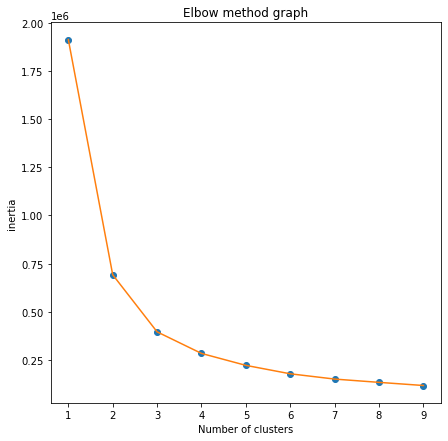

In [33]:
# plot elbow graph
plt.figure(figsize=(7,7))
plt.plot(np.arange(1,10),inertia,'o')
plt.plot(np.arange(1,10),inertia,'-')
plt.title('Elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

model with k=3

In [16]:
k_means=KMeans(n_clusters=3,random_state=42)
k_means.fit(wine_df)

KMeans(n_clusters=3, random_state=42)

In [17]:
k_means.cluster_centers_

array([[8.48238095e+00, 5.19446429e-01, 2.70619048e-01, 2.37101190e+00,
        8.44940476e-02, 9.18333333e+00, 2.29559524e+01, 9.96628381e-01,
        3.31033333e+00, 6.48333333e-01, 1.05892460e+01],
       [7.88755187e+00, 5.72365145e-01, 2.75643154e-01, 3.23236515e+00,
        8.83983402e-02, 2.61514523e+01, 1.08506224e+02, 9.96934730e-01,
        3.28962656e+00, 6.52033195e-01, 1.00089212e+01],
       [8.25675676e+00, 5.20675676e-01, 2.69382239e-01, 2.48822394e+00,
        9.18532819e-02, 2.19449807e+01, 5.57316602e+01, 9.96851023e-01,
        3.32237452e+00, 6.76911197e-01, 1.03460103e+01]])

In [32]:
# lables
labels=k_means.labels_
labels

array([0, 2, 2, ..., 2, 2, 2])

No handles with labels found to put in legend.


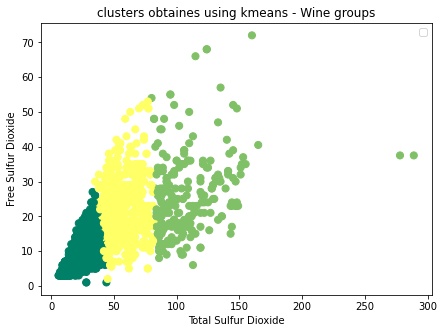

In [31]:
# plot scatter plot
plt.figure(figsize=(7,5))
plt.scatter(wine_df['total sulfur dioxide'],wine_df['free sulfur dioxide'],c=labels,s=50,cmap='summer')
plt.title('clusters obtaines using kmeans - Wine groups')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Free Sulfur Dioxide')
plt.legend()
plt.show()

Now in this whole project we are learn how to work on unlabled data using k-means algoritm 
and the conclusion of 'red wine project' is the k value is 3 (k=3) means data can be cluster into 3 Groups.